<a href="https://colab.research.google.com/github/micaellimaj/Analise-de-Dados/blob/main/Pre%C3%A7oDosDiamantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamantes

### Introdução

Nesse exercício utlizaremos técnicas de visualização de dados em gráficos no conjunto de dados sobre características à respeito de diamantes, encontrada no seguinte link, https://www.kaggle.com/datasets/amirhosseinmirzaie/diamonds-price-dataset. O link contém informações relevantes sobre diamantes, podemos conhecer os atributos logo abaixo e em seguida gerar insights em relação aos dados.

### Atributos

O conjunto de dados, possui os seguintes atributos:

*   **carat**: Peso do diamante em quilates;
*   **cut**: qualidade de corte de diamante;
*   **color**: cor do diamante de J (pior) a D (melhor);
*   **clarity**: Uma medida da claridade do diamante (da esquerda para a direita, do pior para o melhor: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF);
*   **x**: comprimento do diamante em mm;
*   **y**: largura do diamante em mm;
*   **z**: profundidade do diamante em mm;
*   **depth**: Profundidade percentual que é igual a z / média(x,y);
*   **table**: A largura do ponto mais largo no topo do diamante;
*   **price [target variable]**: preço do diamante.



### Importando  as bibliotecas e visualizando o conjunto de dados

In [ ]:
# bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
# lendo o arquivo
diamantes = pd.read_csv('diamonds.csv')
# renomeando as colunas
diamantes.columns = ['Peso_kilates','qualidade_corte','cor','medida_claridade','comprimento(mm)','largura(mm)','profundidade(mm)','profundidade(%)','largura_ponto_alto','preço']
display(diamantes)

,Peso_kilates,qualidade_corte,cor,medida_claridade,comprimento(mm),largura(mm),profundidade(mm),profundidade(%),largura_ponto_alto,preço
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# verificar se há valores nulos
valores_nulos = diamantes.isnull().values.any()

if valores_nulos:
    print("Há valores nulos na tabela.")
else:
    print("Não há valores nulos na tabela.")

Não há valores nulos na tabela.


**Visualizando exemplos em gráficos**

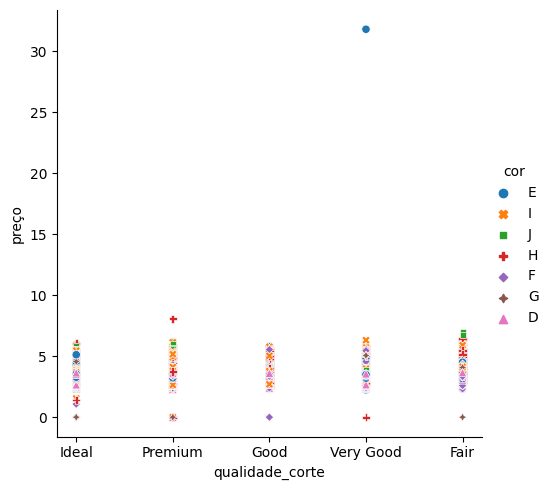

In [ ]:
sns.relplot(data=diamantes,x="qualidade_corte",y="preço",hue="cor",style="cor")

Acima, podemos visualizar a qualidade do corte por preço, separados por categoria de cores.

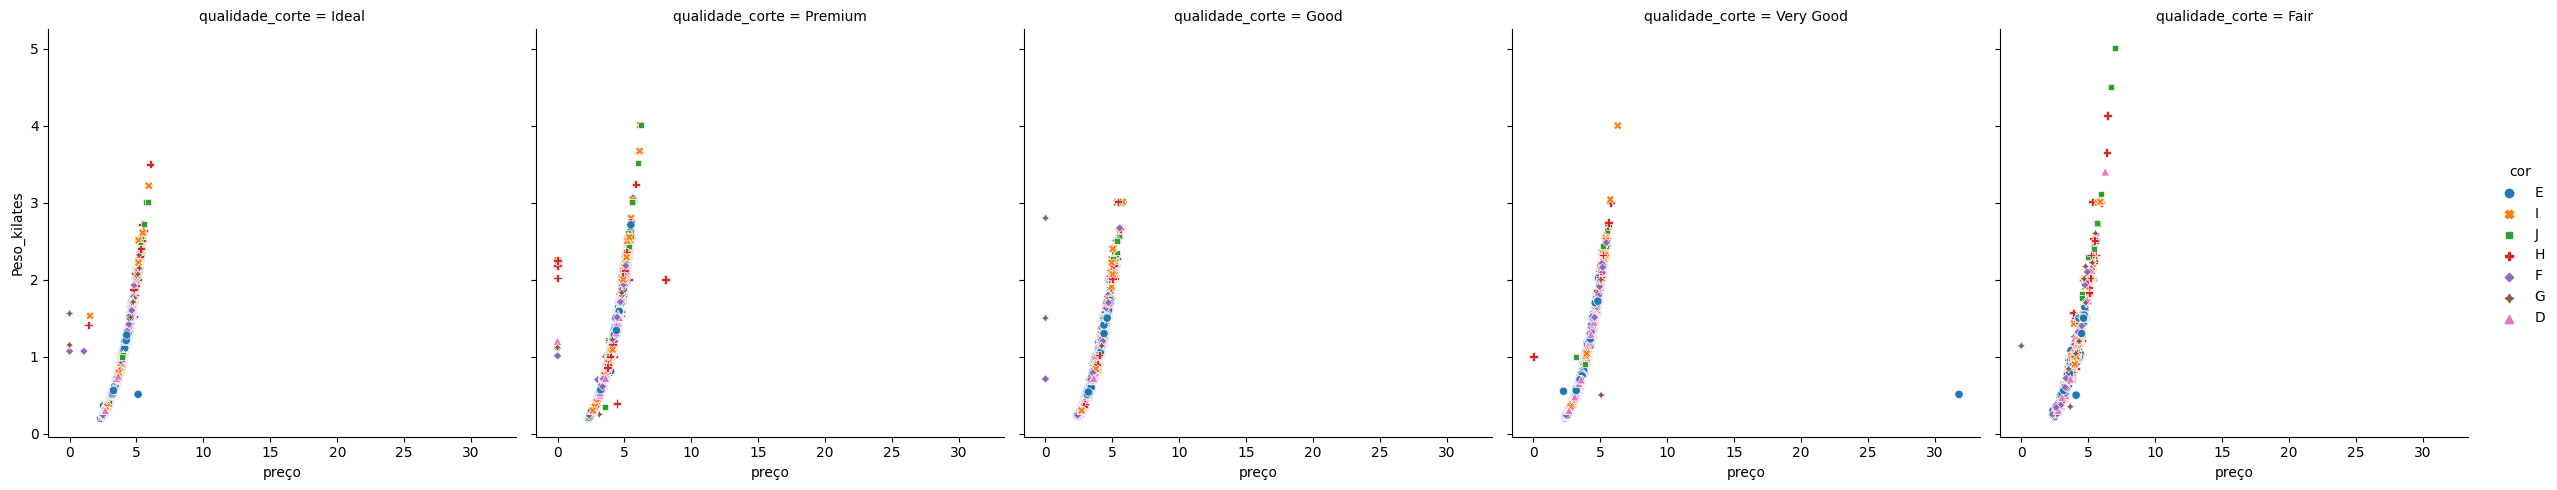

In [ ]:
sns.relplot(data=diamantes,x='preço',y="Peso_kilates",hue="cor",style='cor',col="qualidade_corte")

Acima, podemos visualizar a variação do preço pelo peso do kilate, separados em gráficos de acordo com os tipos da qualidade(ideal, premium, good, very good e fair), representando novamente os pontinhos coloridos a cor do diamante.

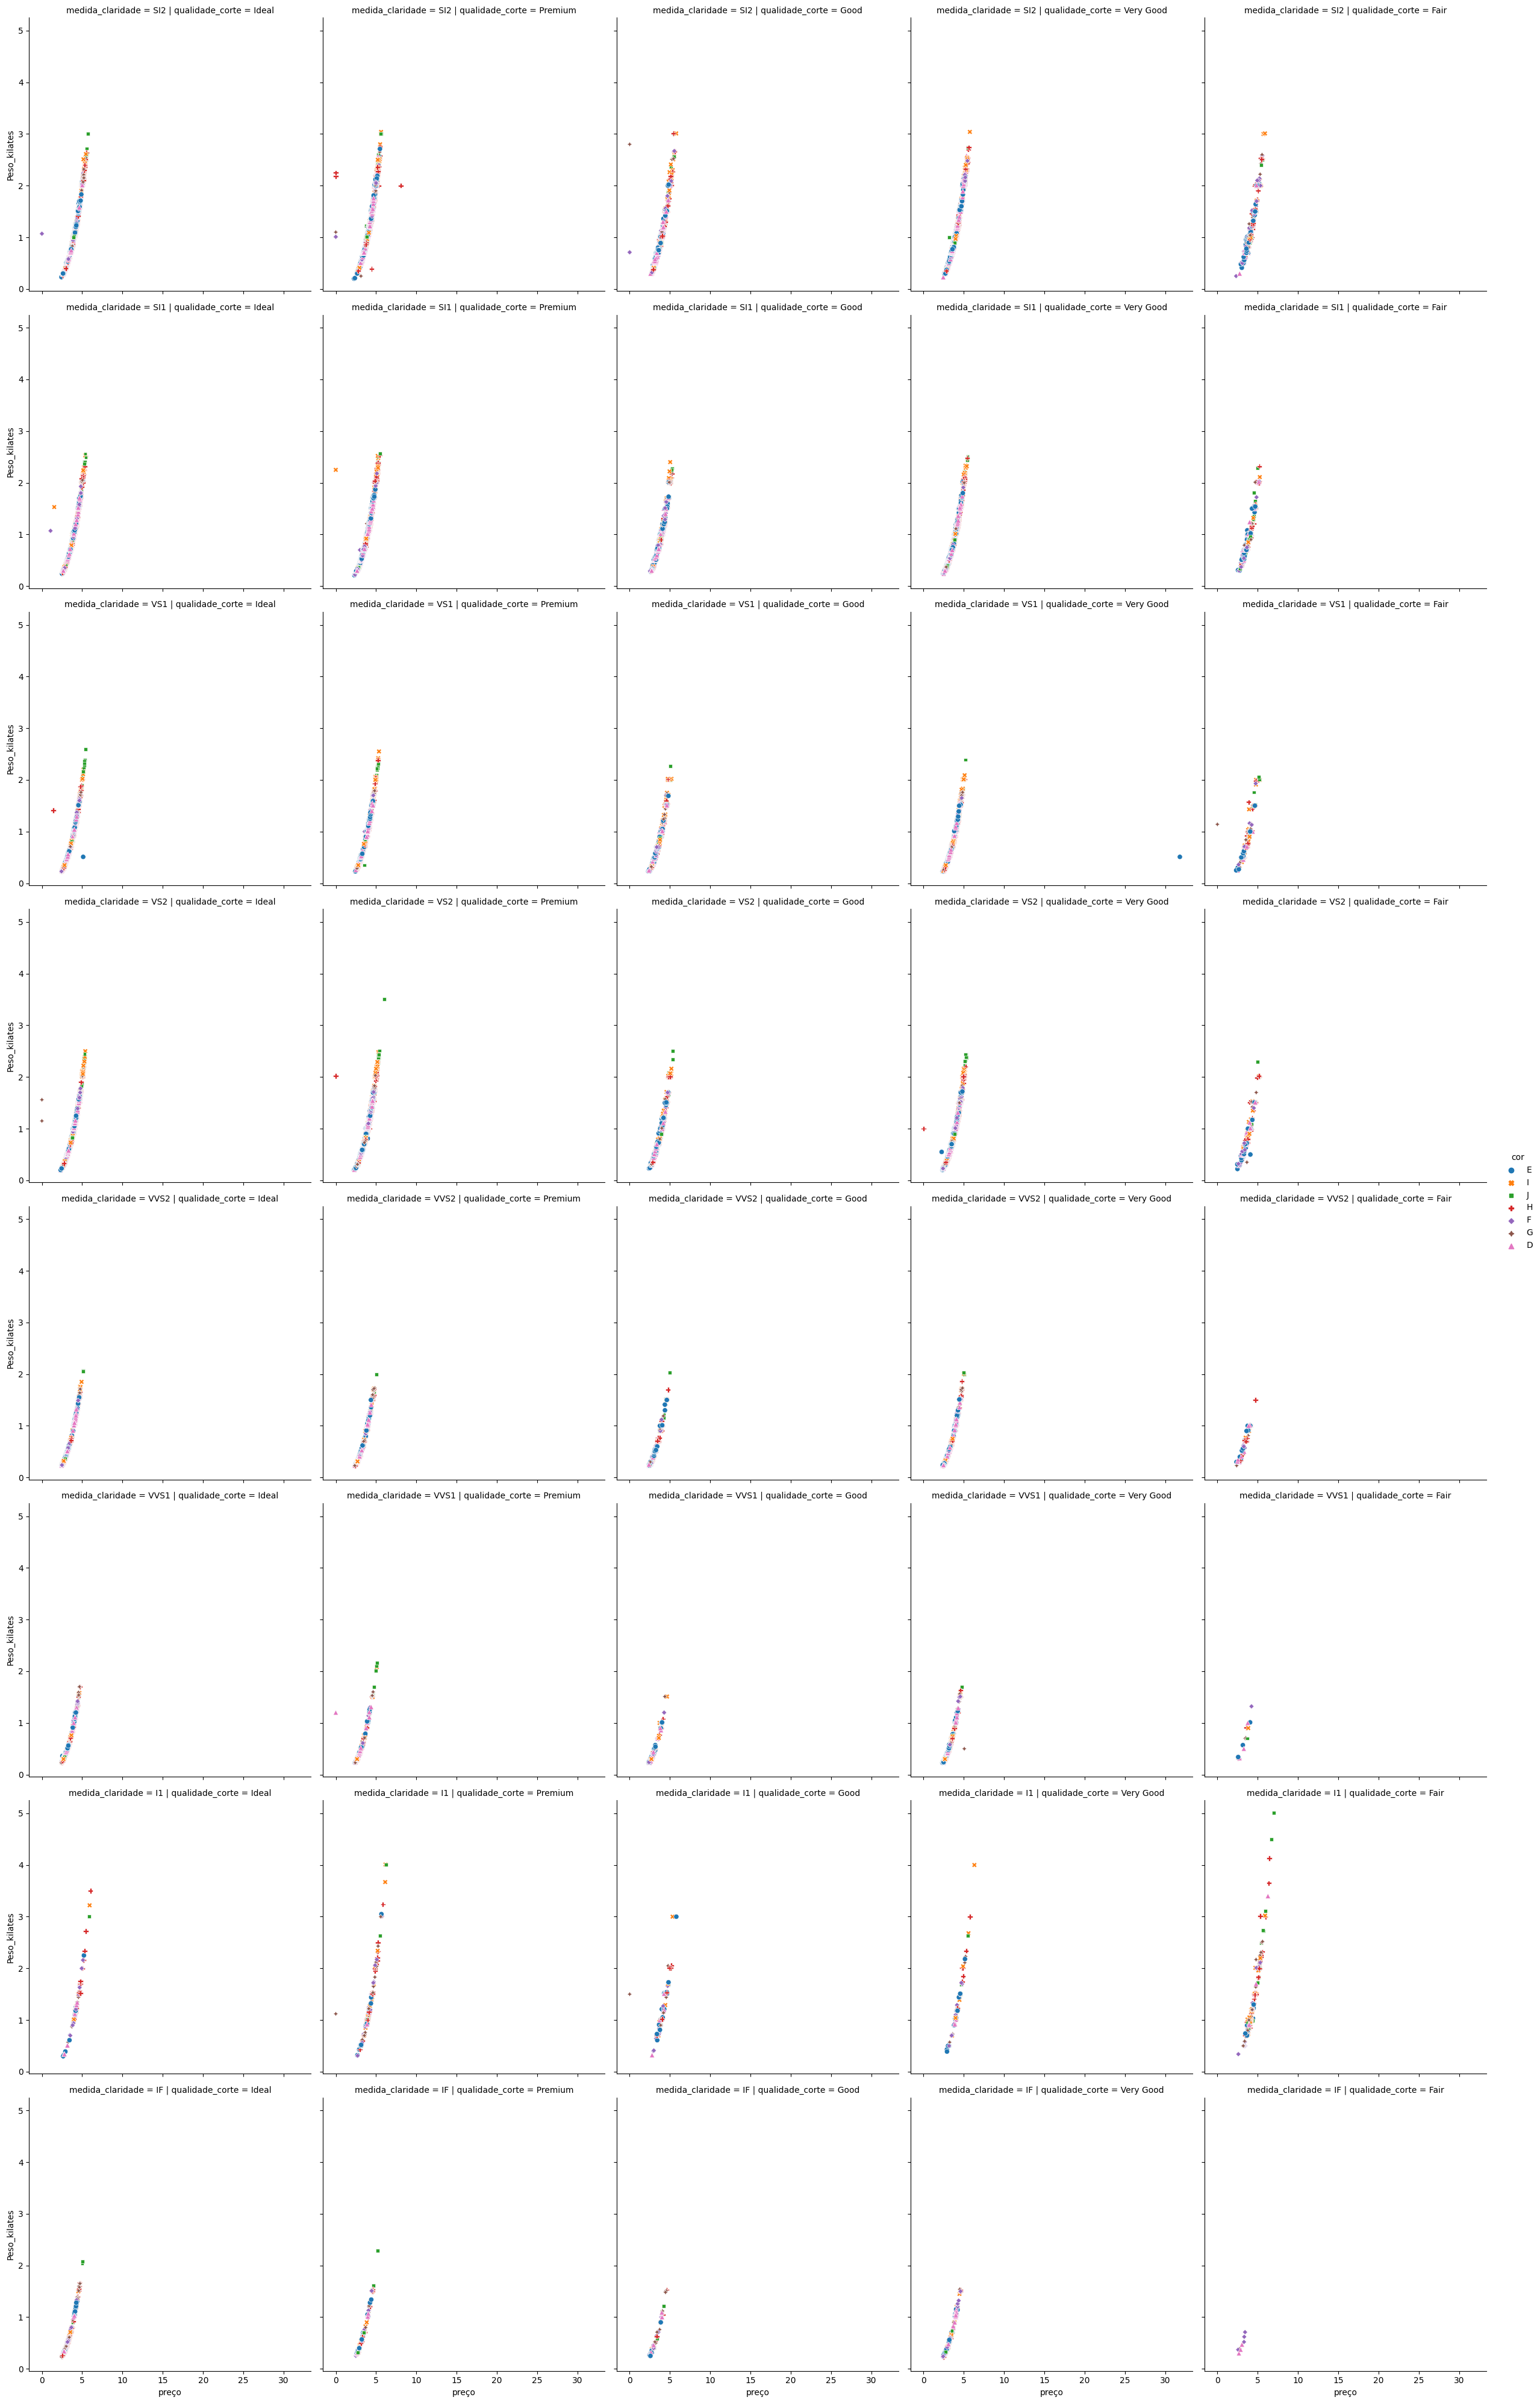

In [ ]:
sns.relplot(data=diamantes,x="preço",y="Peso_kilates",hue="cor",style="cor",col="qualidade_corte",row="medida_claridade")

Acima, podemos visualizar a variação do preço pelo peso em kilates separados em gráficos de acordo com o tipos de qualidade  e as medidas de claridade(I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF), representando a cor do diamante os pontinhos coloridos.

### Preço dos diamantes por categoria

**1. Preço por qualidade do corte**

In [ ]:
qualidade = diamantes[["qualidade_corte", "preço"]].groupby("qualidade_corte").agg("sum").reset_index()
qualidade["percent"] = 100 * qualidade["preço"] / diamantes["preço"].sum()
qualidade.head()

,qualidade_corte,preço,percent
0,Fair,5952.76,3.362138
1,Good,16622.09,9.388211
2,Ideal,67843.77,38.318383
3,Premium,46750.52,26.404846
4,Very Good,39883.66,22.526421


<ipython-input-32-748942adcf62>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico = sns.barplot(data=qualidade, x ='qualidade_corte',y='preço', ci=None,palette="pastel")


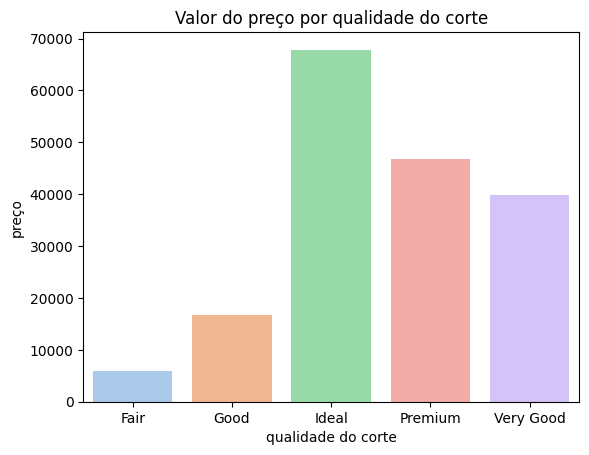

In [ ]:
grafico = sns.barplot(data=qualidade, x ='qualidade_corte',y='preço', ci=None,palette="pastel")
grafico.set(title='Valor do preço por qualidade do corte',xlabel='qualidade do corte',ylabel='preço');

**2. Preço por tipo de cor**

In [ ]:
cor = diamantes[["preço","cor"]].groupby("cor").agg("sum").reset_index()
total_price = diamantes["preço"].sum()
cor["percent"] = 100 * cor["preço"] / total_price
cor.head()

,cor,preço,percent
0,D,20806.29,11.751461
1,E,30361.68,17.148376
2,F,30743.26,17.363894
3,G,36646.71,20.698182
4,H,28524.69,16.110838


<Axes: ylabel='percent'>

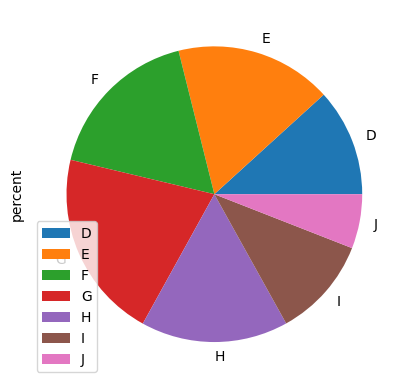

In [ ]:
cor.plot.pie(y="percent",labels=cor["cor"])

**3. Preço por medida de claridade**

In [ ]:
medida = diamantes[["medida_claridade", "preço"]].groupby("medida_claridade").agg("sum").reset_index()
medida.head()

,medida_claridade,preço
0,I1,2902.47
1,IF,5008.88
2,SI1,44115.87
3,SI2,33664.05
4,VS1,26085.53


<ipython-input-40-d3d7a11a9011>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=medida, x ="medida_claridade",y="preço",palette="pastel")


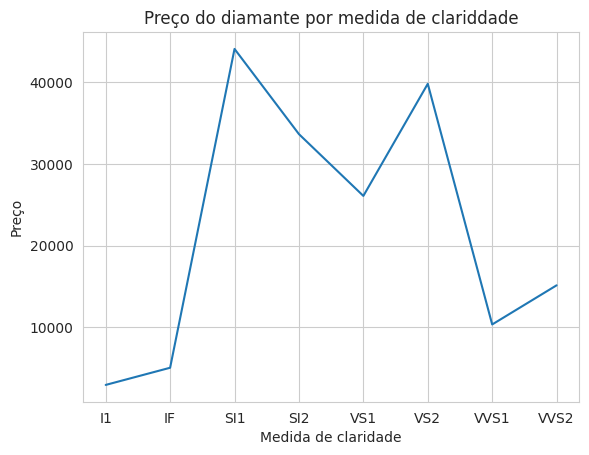

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=medida, x ="medida_claridade",y="preço",palette="pastel")
  grafico.set(title='Preço do diamante por medida de clariddade',xlabel='Medida de claridade',ylabel='Preço')

### Inferências e Conclusão

*   Descobrimos o preço do diamantes por qualidade, claridade e cor.
*   Pudemos identificar a variação dos preços com o parâmetro utilizado.
*   Não foi possível fazer as análises pretendidas com esse pequeno projeto, por o banco de dados possuí variáveis que dificultam a utilização de alguns gráficos, como gráfico de dispersão, que seria ideal, caso, por exemplo, a "qualidade_corte", tivesse valores únicos e uma quantidade menor de linhas, entre outros exemplos.
*   Comparamos os dados.

